<a href="https://colab.research.google.com/github/james-caldwell1981/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')

In [3]:
df.head()

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
samp1 = df.sample(20, random_state=42)
samp2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [5]:
samp1['ConvertedSalary'].mean()


55752.2

In [6]:
samp2['ConvertedSalary'].mean()


68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

I trust sample 2 more because of larger representation of the population. A non-technical audience may understand greater precision is obtained with larger representation but necessarily how or why. In short, no.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

Given the deviation of sample 1 from sample 2, it indicates there is at least a |sample1 - sample2| margin of error.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



Articulate margin of error in plain english as a range of units used to demonstrate the data.

In [7]:
samp1.mean()

Unnamed: 0         44609.55
ConvertedSalary    55752.20
dtype: float64

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
def conf_interval(data, confidence):

    samp = np.array(data)

    xbar = samp.mean()

    s = np.std(samp, ddof=1)

    n = samp.shape[0]

    t= stats.t.ppf((1+confidence) / 2, n-1)

    std_err = s / np.sqrt(n)

    moe = std_err * t
    upper = xbar + moe
    lower = xbar - moe
#   print('MOE: ',moe, 'Upper :',upper, 'Lower :', lower)
    return (lower, upper, xbar)

In [14]:
inter1 = conf_interval(samp1['ConvertedSalary'], .95)
conf_inter1 = inter1[1]-inter1[0]

print('Lower Limit: ', inter1[0])
print('Upper Limit: ', inter1[1])
print('Sample Mean: ', inter1[2])
print('Margin of Error: ', conf_inter1)

Lower Limit:  35805.10309625536
Upper Limit:  75699.29690374463
Sample Mean:  55752.2
Margin of Error:  39894.19380748927


In [13]:
inter2 = conf_interval(samp2['ConvertedSalary'], .95)
conf_inter2 = inter2[1]-inter2[0]

print('Lower Limit: ', inter2[0])
print('Upper Limit: ', inter2[1])
print('Sample Mean: ', inter2[2])
print('Margin of Error: ', conf_inter2)

Lower Limit:  60593.058804479086
Upper Limit:  76509.45119552092
Sample Mean:  68551.255
Margin of Error:  15916.39239104183


**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

Margin of Error represents the amount an estimate may differ from actuallity in sampling.

In [15]:
print('Sample Mean: ', inter1[2])
print('Margin of Error: ', conf_inter1)

Sample Mean:  55752.2
Margin of Error:  39894.19380748927


In [16]:
print('Sample Mean: ', inter2[2])
print('Margin of Error: ', conf_inter2)

Sample Mean:  68551.255
Margin of Error:  15916.39239104183


## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

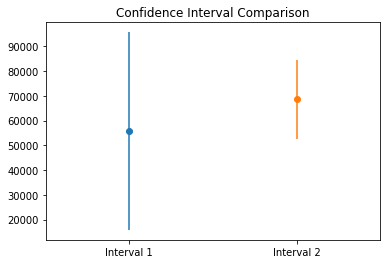

In [26]:
plt.errorbar(x=0, y=inter1[2], yerr=conf_inter1,fmt='o')
plt.errorbar(x=1, y=inter2[2], yerr=conf_inter2,fmt='o')
plt.title('Confidence Interval Comparison')
plt.xticks(ticks=[0,1], labels=['Interval 1', 'Interval 2'])
plt.xlim(-.5, 1.5)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

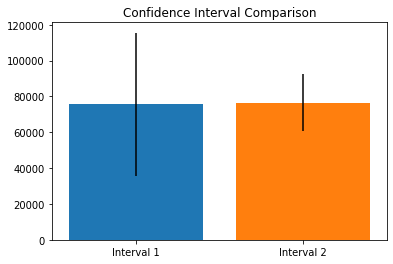

In [29]:
plt.bar(x=0, height=inter1[1], yerr=conf_inter1)
plt.bar(x=1, height=inter2[1], yerr=conf_inter2)
plt.title('Confidence Interval Comparison')
plt.xticks(ticks=[0,1], labels=['Interval 1', 'Interval 2'])
plt.xlim(-.5, 1.5)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [31]:
inter3 = conf_interval(df['ConvertedSalary'], .95)
conf_inter3 = inter3[1]-inter3[0]

print('Lower Limit: ', inter3[0])
print('Upper Limit: ', inter3[1])
print('Sample Mean: ', inter3[2])
print('Margin of Error: ', conf_inter3)

Lower Limit:  71299.82986224785
Upper Limit:  75606.97854050477
Sample Mean:  73453.40420137631
Margin of Error:  4307.148678256926


Using the entire dataset narrows the Margin of Error making our estimates very precise.

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

Precision is when confidence intervals are very narrow and provide a realistic representation of a population with a low standard error. Accuracy is a measurement of how close a measured value is to a known value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

That out of 100 measurements, the true value will fall within the confidence interval 95% of the time.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.